<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Création des articulations

In [373]:
class Articulation:
  def __init__(self, x, y, vx=0, vy=0):
    self.x = x
    self.y = y
    self.vx = vx
    self.vy = vy

  def deplace(self):
    self.x += self.vx
    self.y += self.vy

  def get_x(self):
    return self.x

  def set_x(self, x):
    self.x = x

  def get_y(self):
    return self.y

  def set_y(self, y):
    self.y = y

  def __str__ (self):
    return 'Mon articulation (x=' + str(self.x) + ' ,y=' + str(self.y) + ' ,vx=' + str(self.vx) + ' ,vy=' + str(self.vy) + ')'

  def get_xy(self):
    return [self.x, self.y]

a = Articulation(5,5,3,2)
a.deplace()
print(a)
b = Articulation(4,2)
print(b)

Mon articulation (x=8 ,y=7 ,vx=3 ,vy=2)
Mon articulation (x=4 ,y=2 ,vx=0 ,vy=0)


Affichage des articulations

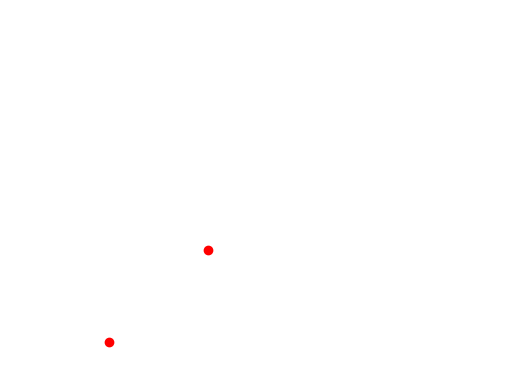

In [374]:
import matplotlib.pyplot as plt

plt.plot(a.get_x(), a.get_y(), 'ro')
plt.plot(b.get_x(), b.get_y(), 'ro')

plt.axis([0, 20, 0, 20])
plt.axis('off')
plt.show()


Création des membres

In [375]:
import math

class Membre:
  def __init__(self, a, b):
    self.a = a
    self.b = b
  
  def set_a(self, a):
    self.a = a
  
  def set_b(self, b):
    self.b = b

  def get_a(self):
    return [self.a.get_x(),self.a.get_y()]

  def get_b(self):
    return [self.b.get_x(),self.b.get_y()]
  
  def get_x(self):
    return self.a.get_x(),self.b.get_x()

  def get_y(self):
    return self.a.get_y(),self.b.get_y()
  
  def taille(self):
    return math.dist(self.get_a(),self.get_b())

  def __str__ (self):
    return 'Mon membre (a=(' + str(self.a.get_x()) +', ' +  str(self.a.get_y()) + '), b=(' + str(self.b.get_x()) +', ' +  str(self.b.get_y()) + '))'

m = Membre(a,b)
print(m)

Mon membre (a=(8, 7), b=(4, 2))


Affichage des membres

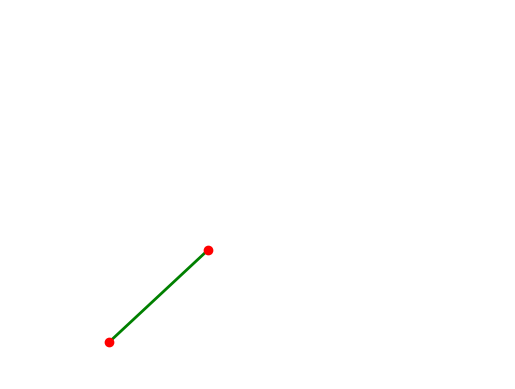

In [376]:
import matplotlib.pyplot as plt

line = plt.plot(m.get_x(),m.get_y())
plt.setp(line, color='g', linewidth=2.0)

plt.plot(a.get_x(), a.get_y(), 'ro')
plt.plot(b.get_x(), b.get_y(), 'ro')

plt.axis([0, 20, 0, 20])
plt.axis('off')
plt.show()

Création des créatures

In [377]:
class Creature:
  def __init__(self):
    self.art = []
    self.mbr = []
    
  def ajoute_articulation(self, a):
    self.art.append(a)
    
  def ajoute_membre(self, m):
    self.mbr.append(m)
  
  def get_art(self):
    return self.art

  def get_mbr(self):
    return self.mbr
  
  def get_art_x(self):
    l = []
    for i in self.art:
      l.append(i.get_x())
    return l
  
  def get_art_y(self):
    l = []
    for i in self.art:
      l.append(i.get_y())
    return l
  
  def get_mbr_x(self):
    l = []
    for i in self.mbr:
      l.append(i.get_x())
    return l[0]
  
  def get_mbr_y(self):
    l = []
    for i in self.mbr:
      l.append(i.get_y())
    return l[0]
  
  def deplace(self):
    for i in range(len(self.art)):
      self.art[i].deplace()
  
  def __str__ (self):
    t = "Articulations : ("
    t+=str(self.get_art_x())+','+str(self.get_art_y())
    t+=') Membres :'
    t+=str(self.get_mbr_x())+','+str(self.get_mbr_y())
    return t

c = Creature()
c.ajoute_articulation(a)
c.ajoute_articulation(b)
c.ajoute_membre(m)
print(c)

Articulations : ([8, 4],[7, 2]) Membres :(8, 4),(7, 2)


Affichage créature

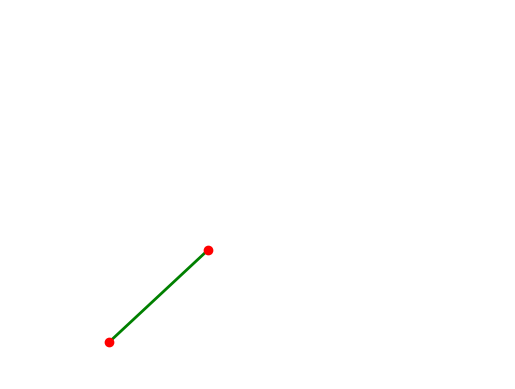

In [378]:
import matplotlib.pyplot as plt

line = plt.plot(c.get_mbr_x(),c.get_mbr_y())
plt.setp(line, color='g', linewidth=2.0)

plt.plot(c.get_art_x(),c.get_art_y(), 'ro')

plt.axis([0, 20, 0, 20])
plt.axis('off')
plt.show()

Déplacement articulation

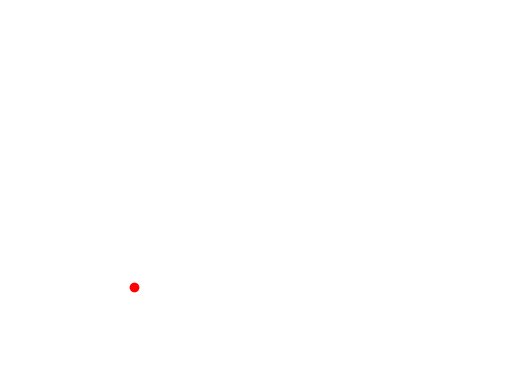

In [379]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

a = Articulation(5,5,.1,.11)

fig = plt.figure()
point, = plt.plot([a.get_x()],[a.get_y()], 'ro')
plt.axis([0, 20, 0, 20])
plt.axis('off')

def animate(i):
  a.deplace()
  point.set_data([a.get_x()],[a.get_y()])
  return point,

In [380]:
ani = animation.FuncAnimation(fig, animate, frames=100,interval=50, blit=True, repeat=False)
HTML(ani.to_html5_video())

Déplacement membre

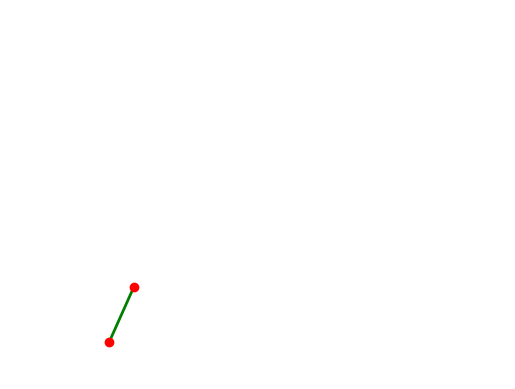

In [381]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

a = Articulation(5,5,.1,.1)
b = Articulation(4,2)
m = Membre(a,b)

fig = plt.figure()

ligne, = plt.plot(m.get_x(),m.get_y())
plt.setp(ligne, color='g', linewidth=2.0)

point1, = plt.plot(a.get_x(), a.get_y(), 'ro')
point2, = plt.plot(b.get_x(), b.get_y(), 'ro')

plt.axis([0, 20, 0, 20])
plt.axis('off')

def animate(i):
  a.deplace()
  b.deplace()
  m.set_a(a)
  m.set_b(b)
  ligne.set_data(m.get_x(),m.get_y())
  point1.set_data([a.get_x()],[a.get_y()])
  return (ligne,point1,point2)

In [382]:
ani = animation.FuncAnimation(fig, animate, frames=100,interval=50, blit=True, repeat=False)
HTML(ani.to_html5_video())

Déplacement créature

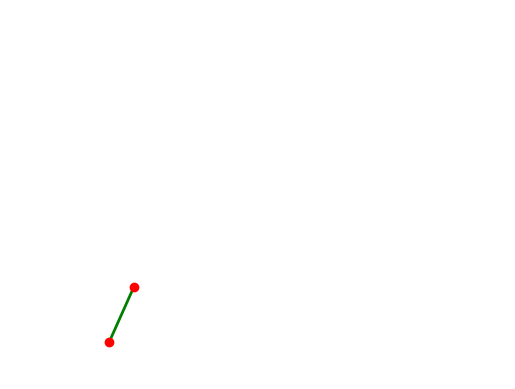

In [383]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

a = Articulation(5,5,.1,.1)
b = Articulation(4,2)
m = Membre(a,b)
c = Creature()
c.ajoute_articulation(a)
c.ajoute_articulation(b)
c.ajoute_membre(m)

fig = plt.figure()

lignes, = plt.plot(c.get_mbr_x(),c.get_mbr_y())
plt.setp(lignes, color='g', linewidth=2.0)

points, = plt.plot(c.get_art_x(),c.get_art_y(), 'ro')

plt.axis([0, 20, 0, 20])
plt.axis('off')

def animate(i):
  c.deplace()
  lignes.set_data(c.get_mbr_x(),c.get_mbr_y())
  points.set_data(c.get_art_x(),c.get_art_y())
  return (lignes,points)

In [384]:
ani = animation.FuncAnimation(fig, animate, frames=100,interval=50, blit=True, repeat=False)
HTML(ani.to_html5_video())

Maintient de la taille des membres

In [385]:
a = Articulation(5,5,.1,.1)
b = Articulation(4,2)
m = Membre(a,b)
c = Creature()
c.ajoute_articulation(a)
c.ajoute_articulation(b)
c.ajoute_membre(m)

for i in c.get_mbr():
  print(i.taille())

3.1622776601683795


In [386]:
import math

class Membre:
  def __init__(self, a, b):
    self.a = a
    self.b = b
    self.ajuste()
    
  def ajuste(self):
    xM = (self.a.get_x() + self.b.get_x())/2
    yM = (self.a.get_y() + self.b.get_y())/2
    coeff = (self.b.get_y() - self.a.get_y()) / (self.b.get_x() - self.a.get_x())
    ord = self.a.get_y() - coeff * self.a.get_x()

    i = 1 + coeff**2
    j = -2*xM-2*(yM-ord)*coeff
    k = xM**2+(yM-ord)**2-0.25

    delta = j**2-4*i*k
    racineDeDelta = math.sqrt(delta)
    solutions = [(-j-racineDeDelta)/(2*i),(-j+racineDeDelta)/(2*i)]
    print(solutions)

    if a.get_x()<b.get_x():
      a.set_x(min(solutions))
      b.set_x(max(solutions))
      a.set_y(a.get_x()*coeff+ord)
      b.set_y(b.get_x()*coeff+ord)
    else:
      b.set_x(min(solutions))
      a.set_x(max(solutions))
      a.set_y(a.get_x()*coeff+ord)
      b.set_y(b.get_x()*coeff+ord)
  
  def set_a(self, a):
    self.a = a
  
  def set_b(self, b):
    self.b = b

  def get_a(self):
    return [self.a.get_x(),self.a.get_y()]

  def get_b(self):
    return [self.b.get_x(),self.b.get_y()]
  
  def get_x(self):
    return self.a.get_x(),self.b.get_x()

  def get_y(self):
    return self.a.get_y(),self.b.get_y()
  
  def taille(self):
    return math.dist(self.get_a(),self.get_b())

  def __str__ (self):
    return 'Mon membre (a=(' + str(self.a.get_x()) +', ' +  str(self.a.get_y()) + '), b=(' + str(self.b.get_x()) +', ' +  str(self.b.get_y()) + '))'

m = Membre(a,b)
print(m)

[4.341886116991581, 4.658113883008419]
Mon membre (a=(4.658113883008419, 3.974341649025259), b=(4.341886116991581, 3.025658350974741))


In [387]:
class Creature:
  def __init__(self):
    self.art = []
    self.mbr = []
    
  def ajoute_articulation(self, a):
    self.art.append(a)
    
  def ajoute_membre(self, m):
    self.mbr.append(m)
  
  def get_art(self):
    return self.art

  def get_mbr(self):
    return self.mbr
  
  def get_art_x(self):
    l = []
    for i in self.art:
      l.append(i.get_x())
    return l
  
  def get_art_y(self):
    l = []
    for i in self.art:
      l.append(i.get_y())
    return l
  
  def get_mbr_x(self):
    l = []
    for i in self.mbr:
      l.append(i.get_x())
    return l[0]
  
  def get_mbr_y(self):
    l = []
    for i in self.mbr:
      l.append(i.get_y())
    return l[0]
  
  def deplace(self):
    for i in range(len(self.art)):
      self.art[i].deplace()
      for j in range(len(self.mbr)):
        self.mbr[j].ajuste()
  
  def __str__ (self):
    t = "Articulations : ("
    t+=str(self.get_art_x())+','+str(self.get_art_y())
    t+=') Membres :'
    t+=str(self.get_mbr_x())+','+str(self.get_mbr_y())
    return t

c = Creature()
c.ajoute_articulation(a)
c.ajoute_articulation(b)
c.ajoute_membre(m)
print(c)

Articulations : ([4.658113883008419, 4.341886116991581],[3.974341649025259, 3.025658350974741]) Membres :(4.658113883008419, 4.341886116991581),(3.974341649025259, 3.025658350974741)


[4.341886116991581, 4.658113883008419]


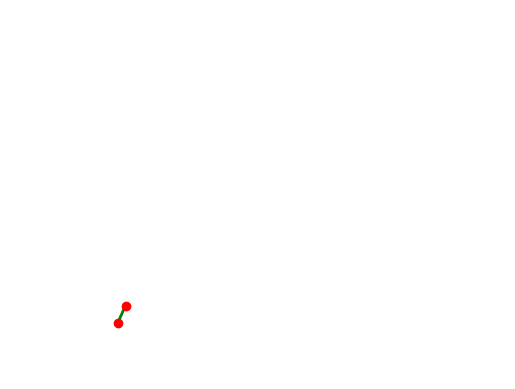

In [388]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

a = Articulation(5,5,.1,.1)
b = Articulation(4,2)
m = Membre(a,b)
c = Creature()
c.ajoute_articulation(a)
c.ajoute_articulation(b)
c.ajoute_membre(m)

fig = plt.figure()

lignes, = plt.plot(c.get_mbr_x(),c.get_mbr_y())
plt.setp(lignes, color='g', linewidth=2.0)

points, = plt.plot(c.get_art_x(),c.get_art_y(), 'ro')

plt.axis([0, 20, 0, 20])
plt.axis('off')

def animate(i):
  c.deplace()
  lignes.set_data(c.get_mbr_x(),c.get_mbr_y())
  points.set_data(c.get_art_x(),c.get_art_y())
  return (lignes,points)

In [389]:
ani = animation.FuncAnimation(fig, animate, frames=100,interval=50, blit=True, repeat=False)
HTML(ani.to_html5_video())

[4.365545232481708, 4.734454767518291]
[4.365545232481695, 4.734454767518302]
[4.3927429888371154, 4.80725701116288]
[4.3927429888370995, 4.807257011162898]
[4.423049768387791, 4.876950231612205]
[4.423049768387785, 4.87695023161221]
[4.456063458390668, 4.943936541609326]
[4.4560634583906555, 4.9439365416093395]
[4.491419453839294, 5.008580546160702]
[4.491419453839294, 5.008580546160702]
[4.528794125448828, 5.071205874551166]
[4.52879412544882, 5.071205874551175]
[4.567904344920761, 5.132095655079233]
[4.567904344920761, 5.132095655079233]
[4.608504835568917, 5.191495164431076]
[4.608504835568901, 5.191495164431093]
[4.65038449147255, 5.2496155085274445]
[4.650384491472545, 5.24961550852745]
[4.693362366328477, 5.306637633671517]
[4.69336236632847, 5.306637633671524]
[4.737283736144746, 5.362716263855249]
[4.737283736144746, 5.362716263855249]
[4.782016448659166, 5.417983551340827]
[4.782016448659159, 5.417983551340834]
[4.827447654180176, 5.472552345819817]
[4.827447654180176, 5.4725